# Datascience X Logistic Regression
## Harry Potter et le Datascientist

In [1]:
import pandas as pd
x_train = pd.read_csv('data/dataset_train.csv')

## V.1 Data Analysis
### McGonagall vous demande de produire un programme nommé describe

In [2]:
# Quick Sort with nlogn runtime
def sort(array=[12,4,5,6,7,3,1,15]):
    less = []
    equal = []
    greater = []
    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            if x == pivot:
                equal.append(x)
            if x > pivot:
                greater.append(x)
        return(sort(less)+equal+sort(greater))
    else:
        return(array)
    
def describe(dataset):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    rownames = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']
    data = dataset.select_dtypes(include=numerics)
    result = pd.DataFrame(columns=data.columns, index=rownames)
    
    for column in data:
        ncolumn = sort(data[column])
        
        result[column]['Count'] = len(ncolumn)
        result[column]['Mean'] = sum(ncolumn)/len(ncolumn)
        result[column]['Std'] = ((1/len(ncolumn))*sum((ncolumn - sum(ncolumn)/len(ncolumn))**2))**0.5
        result[column]['Min'] = ncolumn[0]
        result[column]['25%'] = ncolumn[int(0.25*len(ncolumn))]
        result[column]['50%'] = ncolumn[int(0.50*len(ncolumn))]
        result[column]['75%'] = ncolumn[int(0.75*len(ncolumn))]
        result[column]['Max'] = ncolumn[-1]
    
    return(result)

In [3]:
describe(x_train)

Index Arithmancy Astronomy Herbology Defense Against the Dark Arts  \
Count    1600       1566      1568      1567                          1569   
Mean    799.5    49634.6   39.7971   1.14102                     -0.387863   
Std    461.88    16674.5   520.132   5.21802                       5.21113   
Min         0     -24370  -966.741  -10.2957                      -10.1621   
25%       400      38510  -489.494  -4.31212                       -5.2591   
50%       800      49018   261.645   3.46901                      -2.58934   
75%      1200      60828    525.91   5.42105                       4.90468   
Max      1599     104956   1016.21   11.6129                       9.66741   

      Divination Muggle Studies Ancient Runes History of Magic  \
Count       1561           1565          1565             1557   
Mean     3.15391        -224.59       495.748          2.96309   
Std      4.15397        486.189       106.251          4.42435   
Min       -8.727        -1086.5        283.87         -8.85899   
25%        3.099        -577.58       397.511          2.21865   
50%        4.624       -419.164       463.918          4.37818   
75%        5.667        254.995       597.492          5.82524   
Max       10.032        1092.39       745.396          11.8897   

      Transfiguration  Potions Care of Magical Creatures   Charms   Flying  
Count            1566     1570                      1560     1600     1600  
Mean           1030.1  5.95037                -0.0534271 -243.374   21.958  
Std            44.111  3.14685                  0.971146  8.78089  97.6011  
Min           906.627 -4.69748                  -3.31368 -261.049  -181.47  
25%           1026.17   3.6449                 -0.670996 -250.647   -41.84  
50%           1045.53  5.87758                -0.0432962 -244.868    -2.51  
75%           1058.45  8.24879                  0.594446 -232.537    50.89  
Max           1098.96  13.5368                   3.05655 -225.428   279.07

## V.2 Data Visualization
### V.2.1 Histogram
Faites un script nommé histogram.[extension] qui affiche un histogram répondant à la question suivante:

Quel cours de Poudlard a une répartition des notes homogènes entre les quatres maisons?

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [5]:
def groupData(data):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    classes = data.select_dtypes(include=numerics).drop('Index', axis=1)
    classes['House'] = x_train['Hogwarts House']
    group = pd.DataFrame(columns=['Class', 'House', 'Grade'])
    for column in classes.drop('House', axis=1):
        new = pd.DataFrame(columns=['Class', 'House', 'Grade'])
        new.Grade = classes[column]
        new.House = classes.House
        new.Class = str(column)
        group = group.append(new)
    return(group)
        
def histogram(data):
    group = groupData(x_train)
    g = sns.FacetGrid(group, col='House', row='Class', margin_titles=True, sharex=False, sharey=False)
    g.map(plt.hist, 'Grade', color='steelblue')

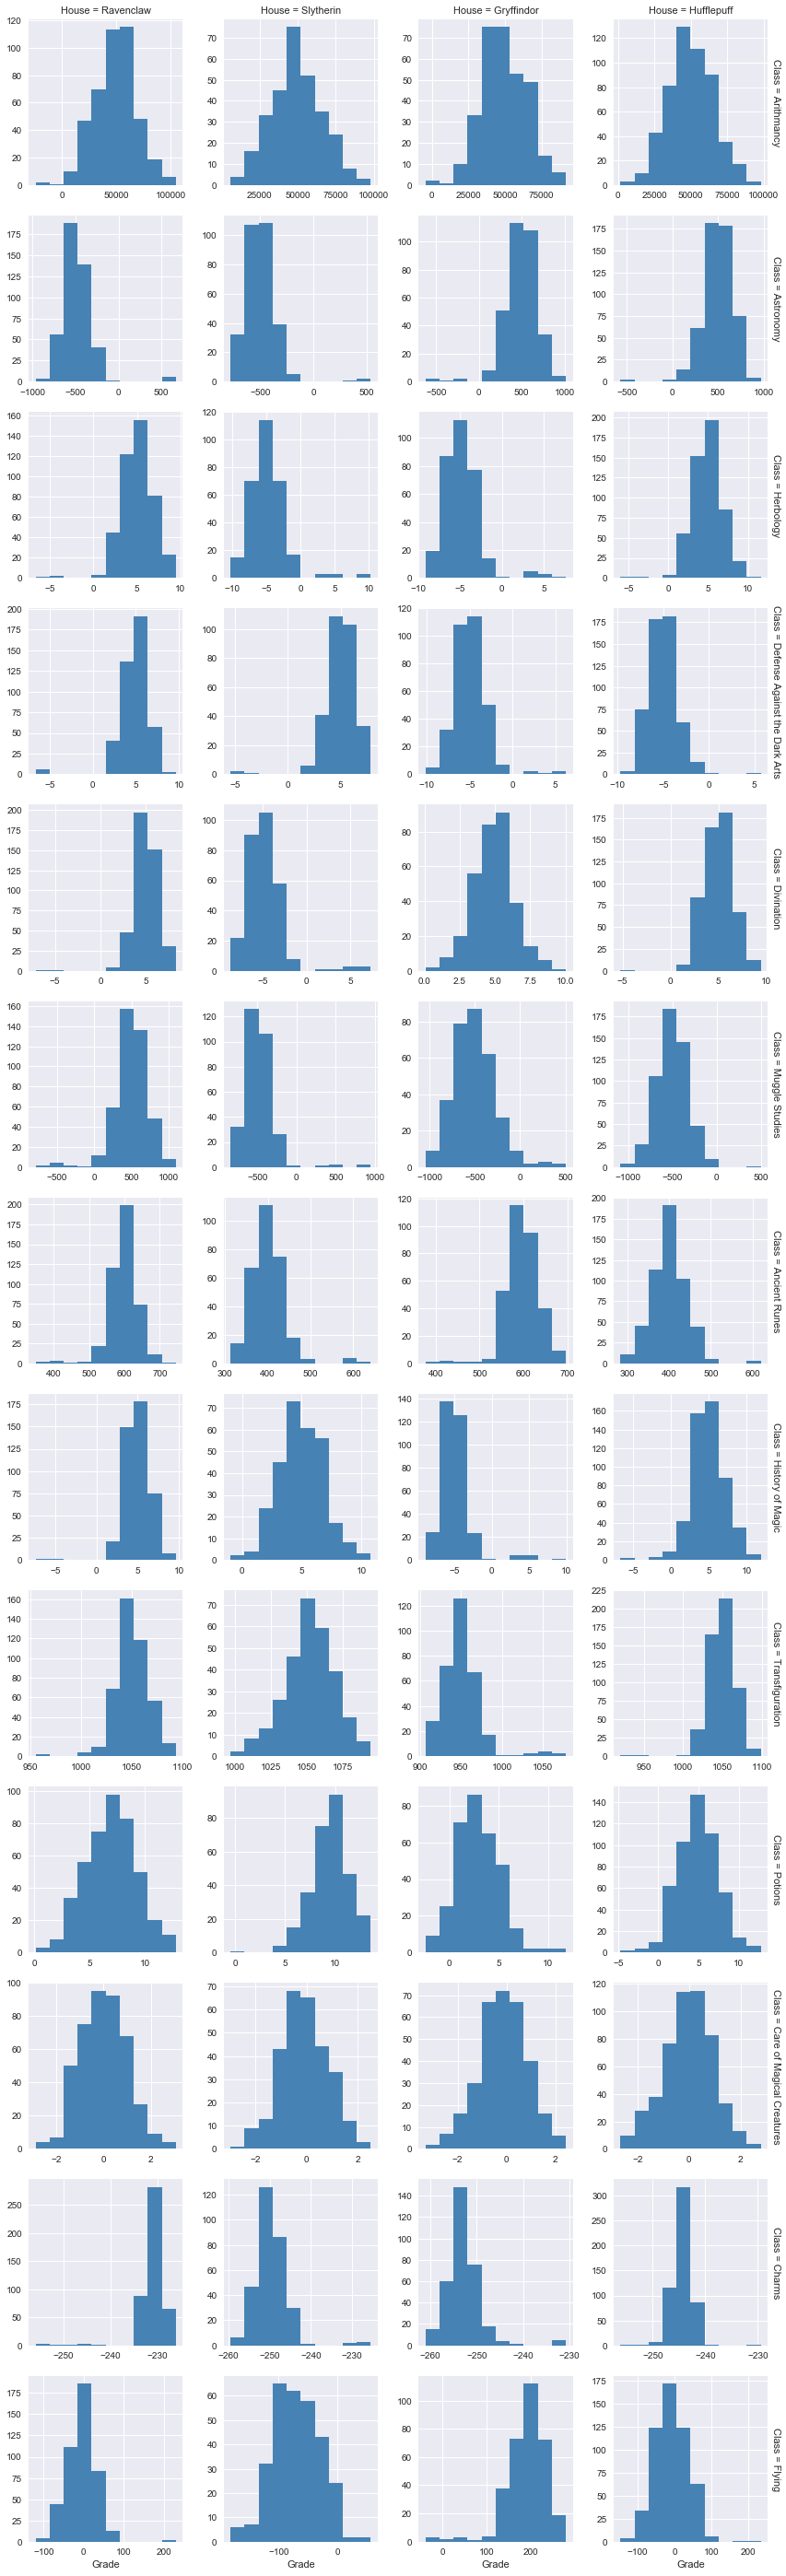

In [6]:
histogram(x_train)

Care of Magical Creatures is the most homogenous class between the four houses

## V.2.2 Scatter plot
Faites un script nommé scatter_plot.[extension] qui affiche un scatter plot répondant à la question suivante:

Quelles sont les deux features qui sont semblables ?

In [65]:
def scatter_plot(x_train, xcolumn, ycolumn):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    rownames = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']
    data = x_train.select_dtypes(include=numerics).drop('Index', axis=1)
    cols = data.columns
    data['House'] = x_train['Hogwarts House']
    colors = {'Gryffindor':'red', 'Hufflepuff':'blue', 'Ravenclaw':'green', 'Slytherin':'black'}
    scatter(data, xcolumn, ycolumn)

def scatter(data, xcolumn, ycolumn):
    plotdata = data[[xcolumn, ycolumn, 'House']].dropna()
    plt.scatter(x = plotdata[xcolumn], y = plotdata[ycolumn], c =plotdata['House'].apply(lambda x: colors[x]))
    plt.title(xcolumn+' vs '+ycolumn)
    plt.xlabel(xcolumn)
    plt.ylabel(ycolumn)
    plt.show()
    
def pair_plot(x_train):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    rownames = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']
    data = x_train.select_dtypes(include=numerics).drop('Index', axis=1)
    xcols = data.columns
    ycols = data.columns
    data['House'] = x_train['Hogwarts House']
    colors = {'Gryffindor':'red', 'Hufflepuff':'blue', 'Ravenclaw':'green', 'Slytherin':'black'}
    for xcolumn in xcols:
        for ycolumn in ycols:
            if xcolumn == ycolumn:
                continue
            scatter(data, xcolumn, ycolumn)
        ycols = ycols.drop(xcolumn)

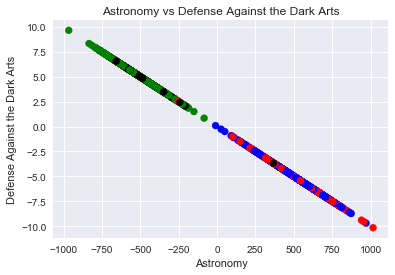

In [66]:
scatter_plot(x_train, 'Astronomy', 'Defense Against the Dark Arts')

Astronomy and Defense Against the Dark Arts have perfectly linear relationship. They also move in opposite directions insersecting at 0


## V.2.3 Pair plot
Faites un script nommé pair_plot.[extension] qui affiche un pair plot ou scatter plot matrix (selon la librairie graphique que vous utiliserez). À partir de cette visualisation, quelles caractéristiques allez-vous utiliser pour entraîner votre prochaine régression logistique ?

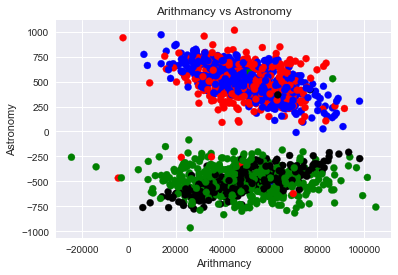

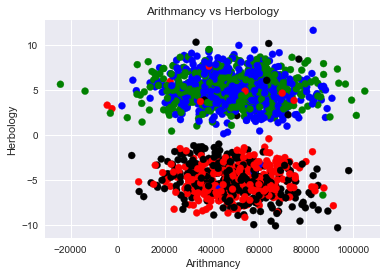

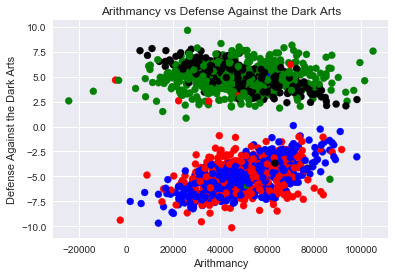

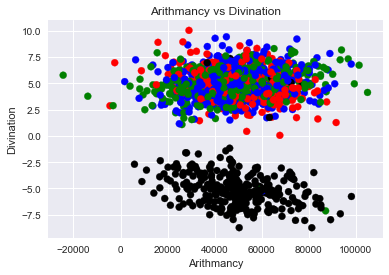

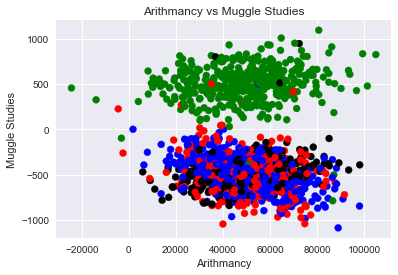

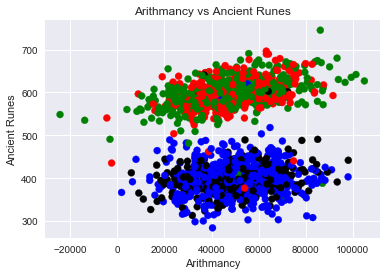

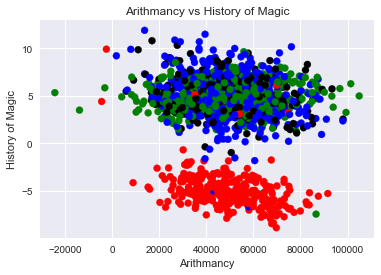

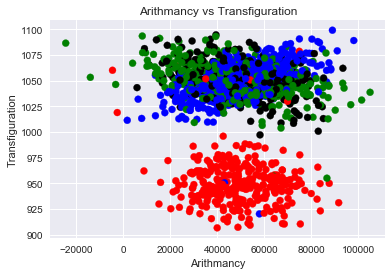

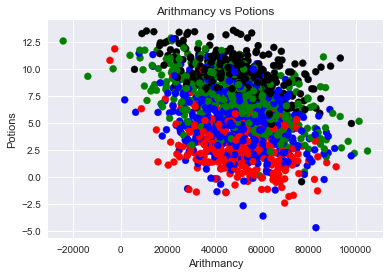

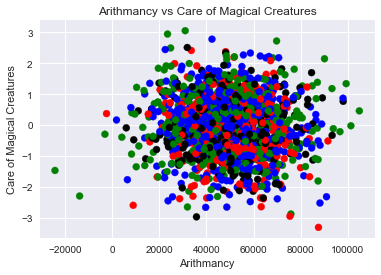

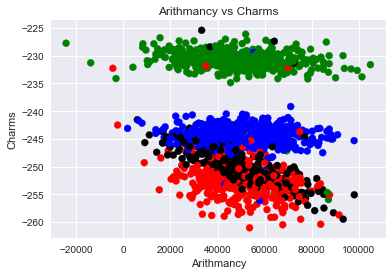

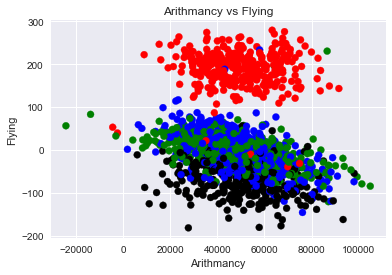

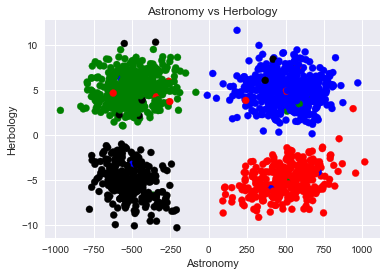

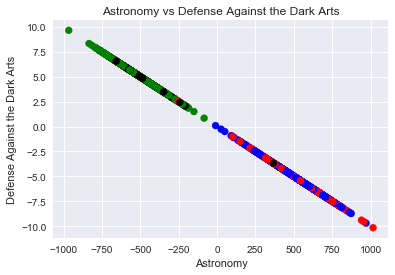

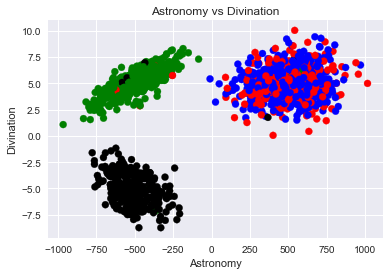

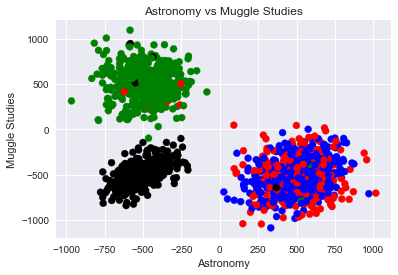

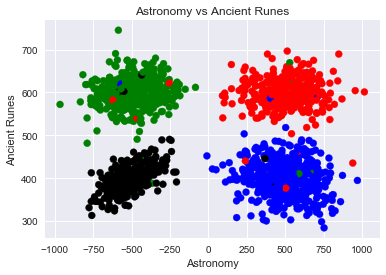

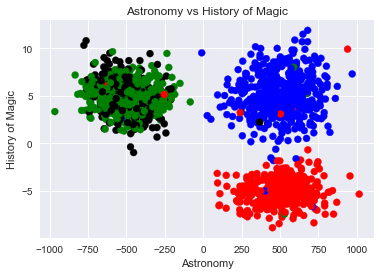

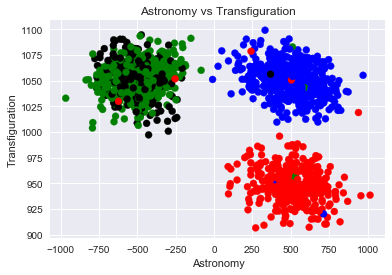

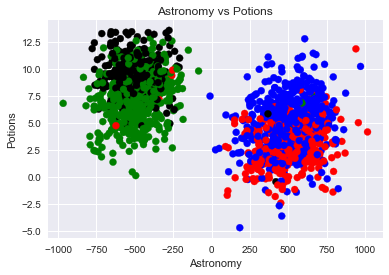

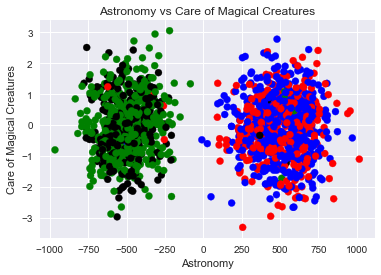

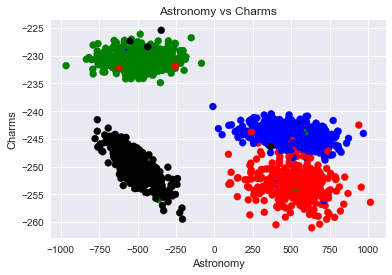

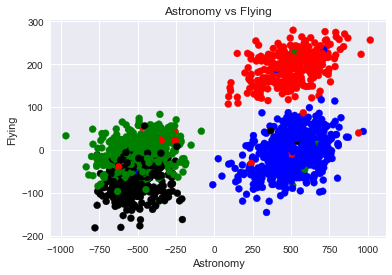

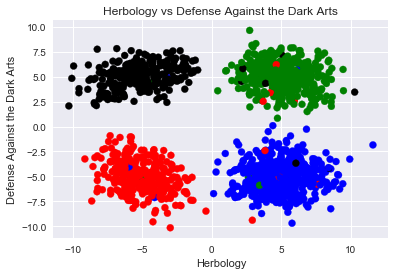

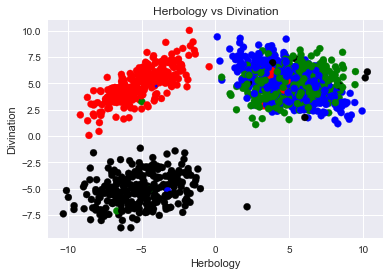

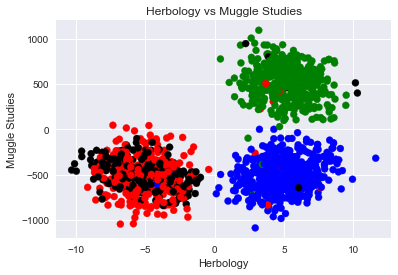

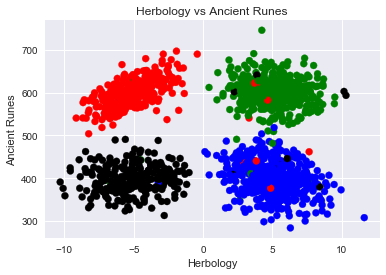

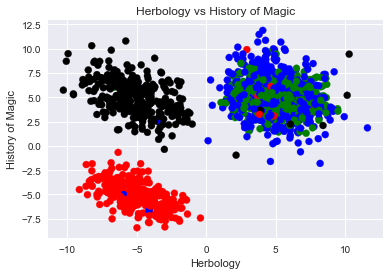

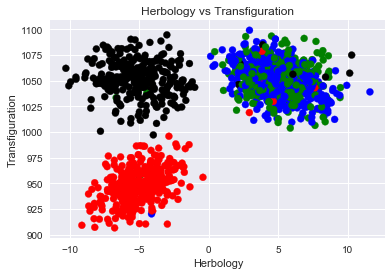

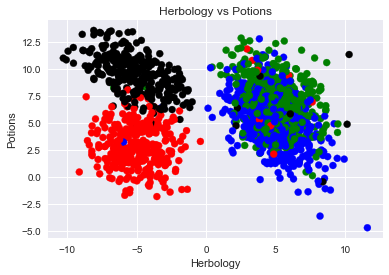

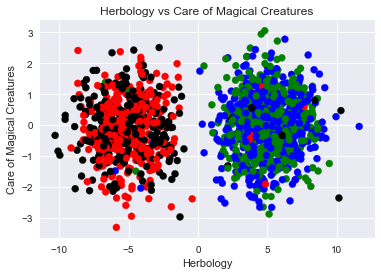

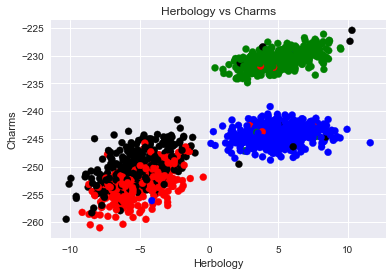

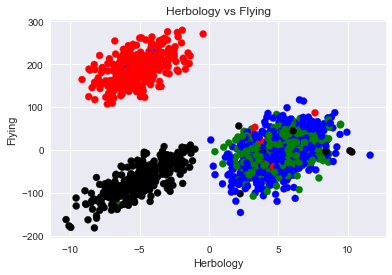

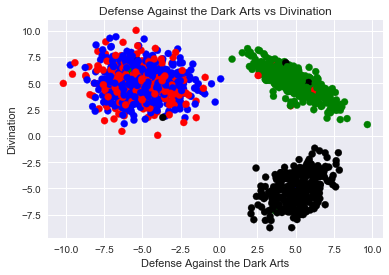

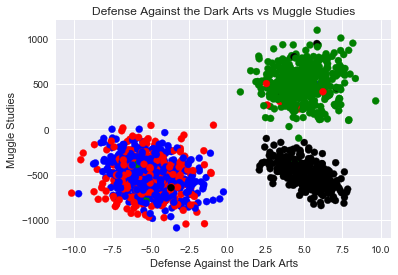

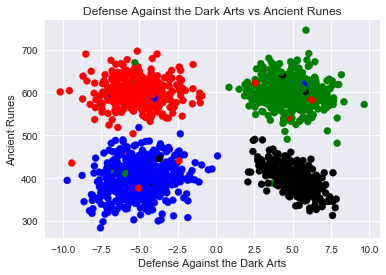

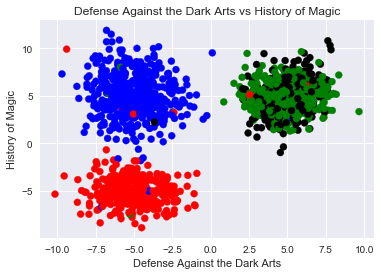

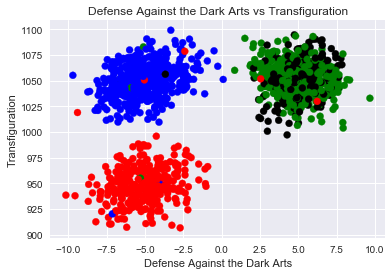

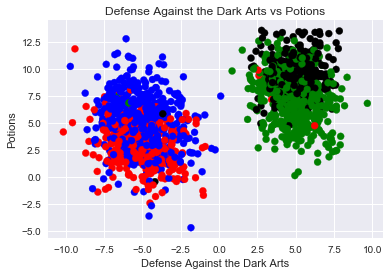

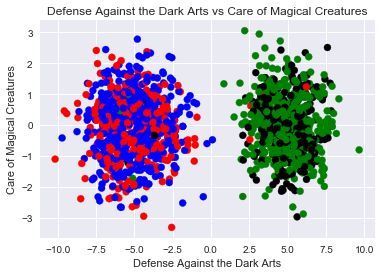

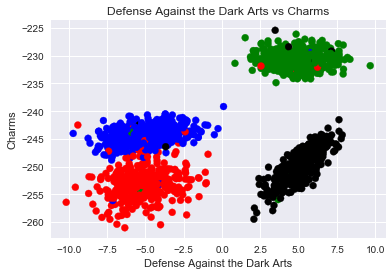

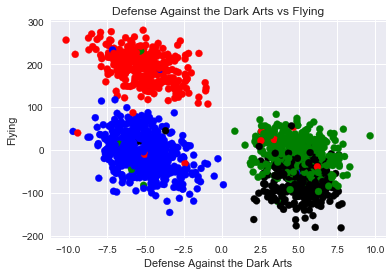

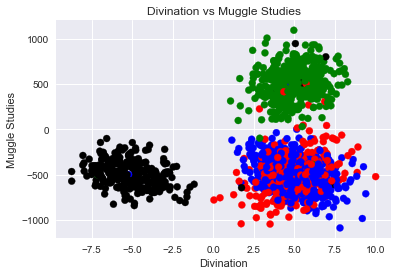

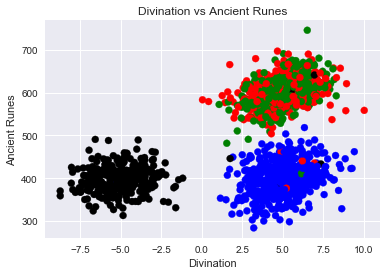

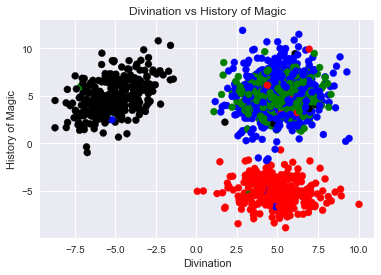

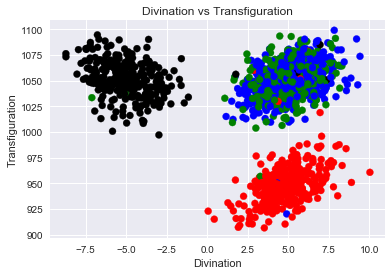

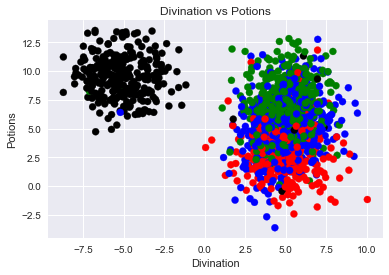

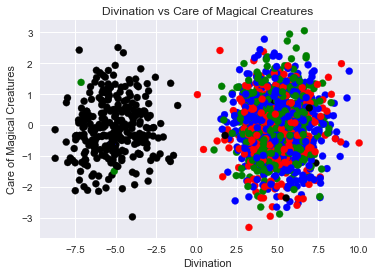

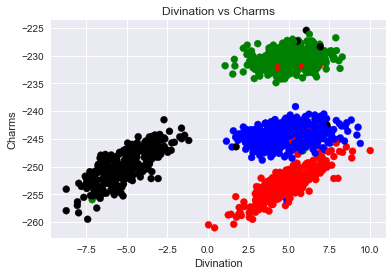

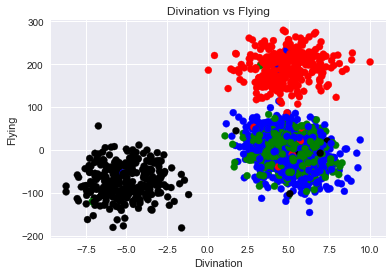

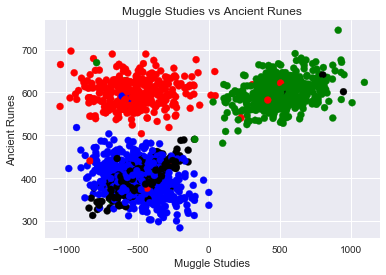

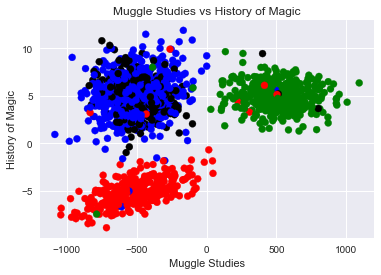

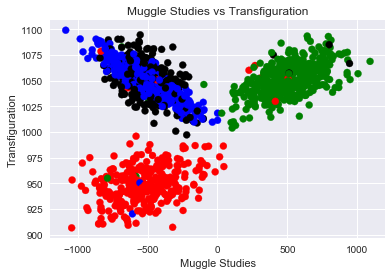

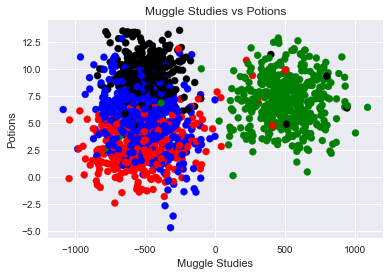

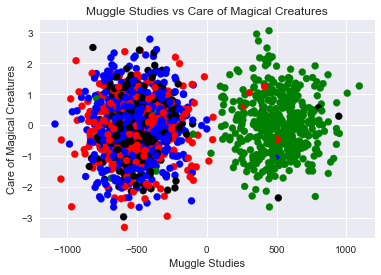

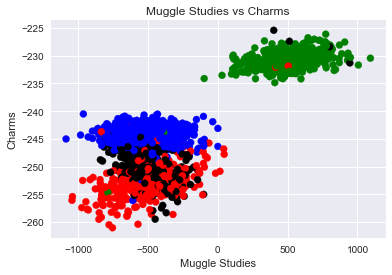

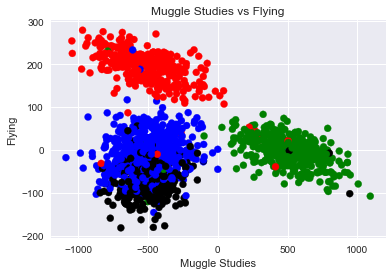

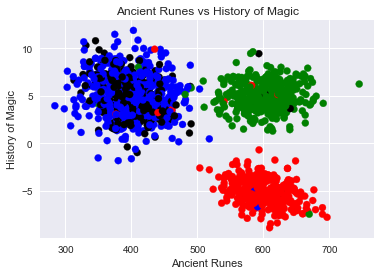

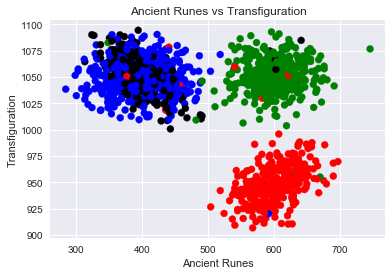

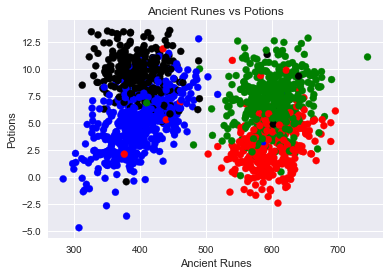

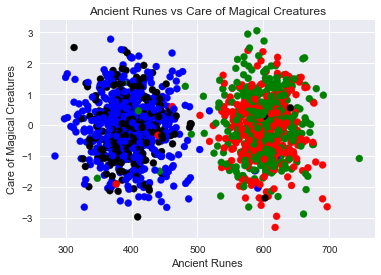

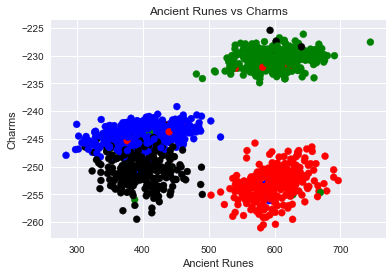

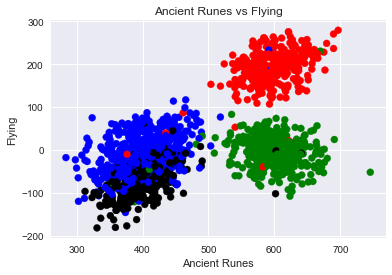

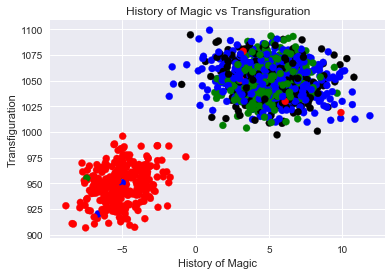

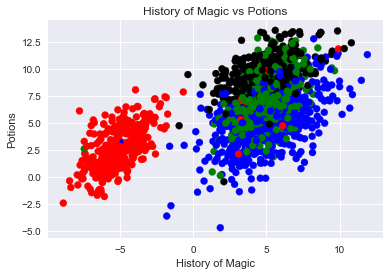

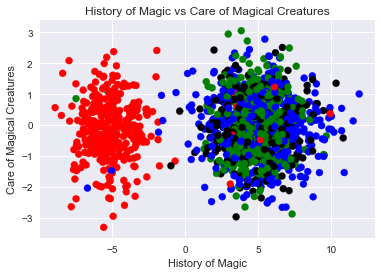

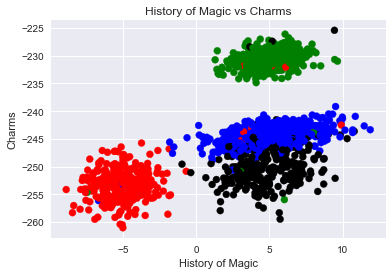

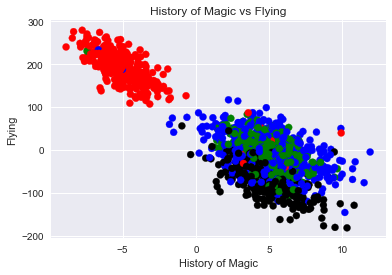

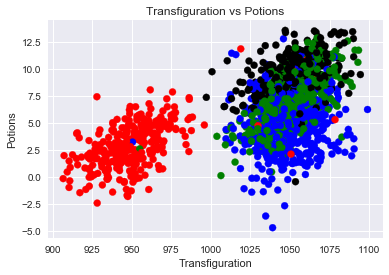

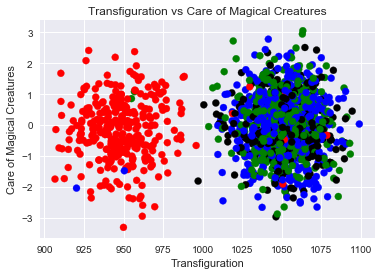

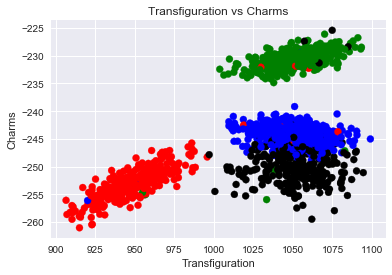

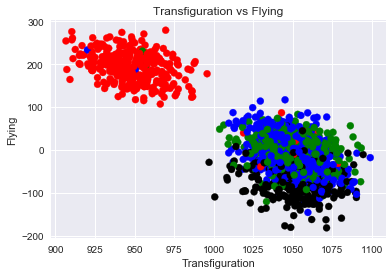

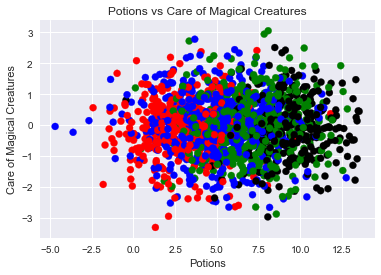

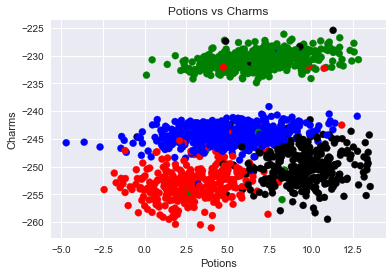

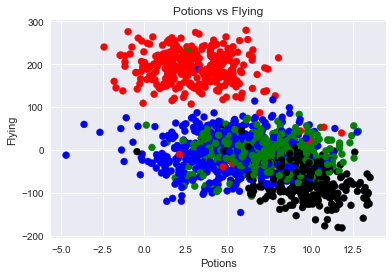

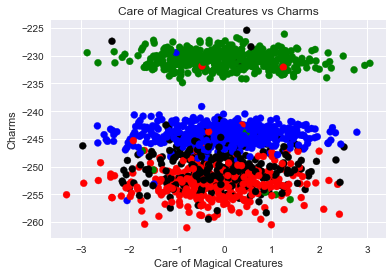

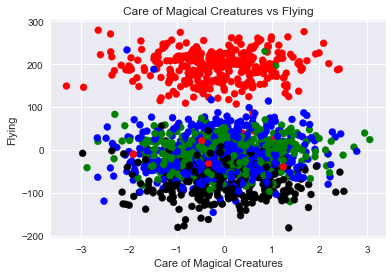

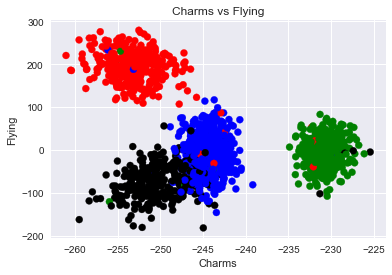

In [67]:
pair_plot(x_train)

### Gryffindor:Red, Hufflepuff:Blue, Ravenclaw:Green, Slytherin:Black

Bad features:
    - Potions + Flying
    - Potions + Care of Magical Creatures
Useful features:
    - Astronomy
    - Herbology
    - Defence Against the Dark Arts
Especially Good:
    - Divination - Black
    - Muggle Studies - Green
    - History of Magic - Red
    - Transfiguration - Red
    - Herbology + Astronomy - ALL
    - Ancient Runes + Astronomy - ALL

Final List:
    - Astronomy
    - Ancient Runes
    - Divination
    - Herbology
    - History of Magic
    - Transfiguration

## V.3 Logistic Regression
Vous arrivez à la dernière partie : coder votre Choixpeau magique. Pour ce faire, il vous est demandé de réaliser un multi-classifieur en utilisant une régression logistique en one-vs-all.